# Target Selection
This notebook will use the prioritization metric discussed in prioritization_TSM_t_HIRES_ratio.ipynb to rank targets in their (planet radius, insolation flux, stellar effective temperature)-bins, and then programmatically sample over which targets should be selected based on those available in the selected_TOIs spreadsheet from TKS.

In [1]:
# System
import os
import glob

# Basic analysis
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100 # See all of the columns when DFs are displayed

# Generate the DataFrame with the new ranking
from X_ranking import *

# Plotting (with fancy font/backend output)
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # For high quality figures

%load_ext autoreload
%autoreload 2

## Load the data

In [2]:
def get_newest_csv(folder_path):
    '''
    Get the filename of csv file in folder_path that is the most recent.
    
    Taken from: https://stackoverflow.com/questions/39327032/how-to-get-the-latest-file-in-a-folder-using-python
    '''
    folder_path += '*.csv'
    list_of_files = glob.glob(folder_path) # * means all if need specific format then *.csv
    return max(list_of_files, key=os.path.getctime)

toi_path = get_newest_csv('data/toi/')
tic_path = get_newest_csv('data/exofop/')
selected_TOIs_path = get_newest_csv('data/TKS/')

# Check to make sure these are the files that you want to use
print('TOI+ list file used: \t {}'.format(toi_path))
print('TIC ExoFOP file used: \t {}'.format(tic_path))
print('selected_TOIs file used: {}'.format(selected_TOIs_path))

TOI+ list file used: 	 data/toi/toi+-2020-03-23.csv
TIC ExoFOP file used: 	 data/exofop/TIC_star_info_2020-03-23.csv
selected_TOIs file used: data/TKS/selected_TOIs.csv


In [3]:
# This call will take a few seconds to execute
X_df, __________ = get_X_ranked_df(toi_path, tic_path) # Don't really need the second dataframe that's returned
print("The X_df dataframe has {} rows.".format(len(X_df)))

selected_TOIs_df = pd.read_csv(selected_TOIs_path)
print("The selected_TOIs_df dataframe has {} rows.".format(len(selected_TOIs_df)))

The X_df dataframe has 742 rows.
The selected_TOIs_df dataframe has 231 rows.


Take the intersection of the targets from our internal ranking dataframe (which incorporates things like known planets when it assigns priorities) and the TOIs in selected_TOIs:

In [4]:
selected_TOIs_IDs = selected_TOIs_df['toi'].values
X_tois_df = X_df[X_df['Full TOI ID'].isin(selected_TOIs_IDs)]
print("The intersection of X_df and the selected_TOIs_df has {} rows.".format(len(X_tois_df)))

The intersection of X_df and the selected_TOIs_df has 102 rows.


## Make a summary plot of the prioritized candidates

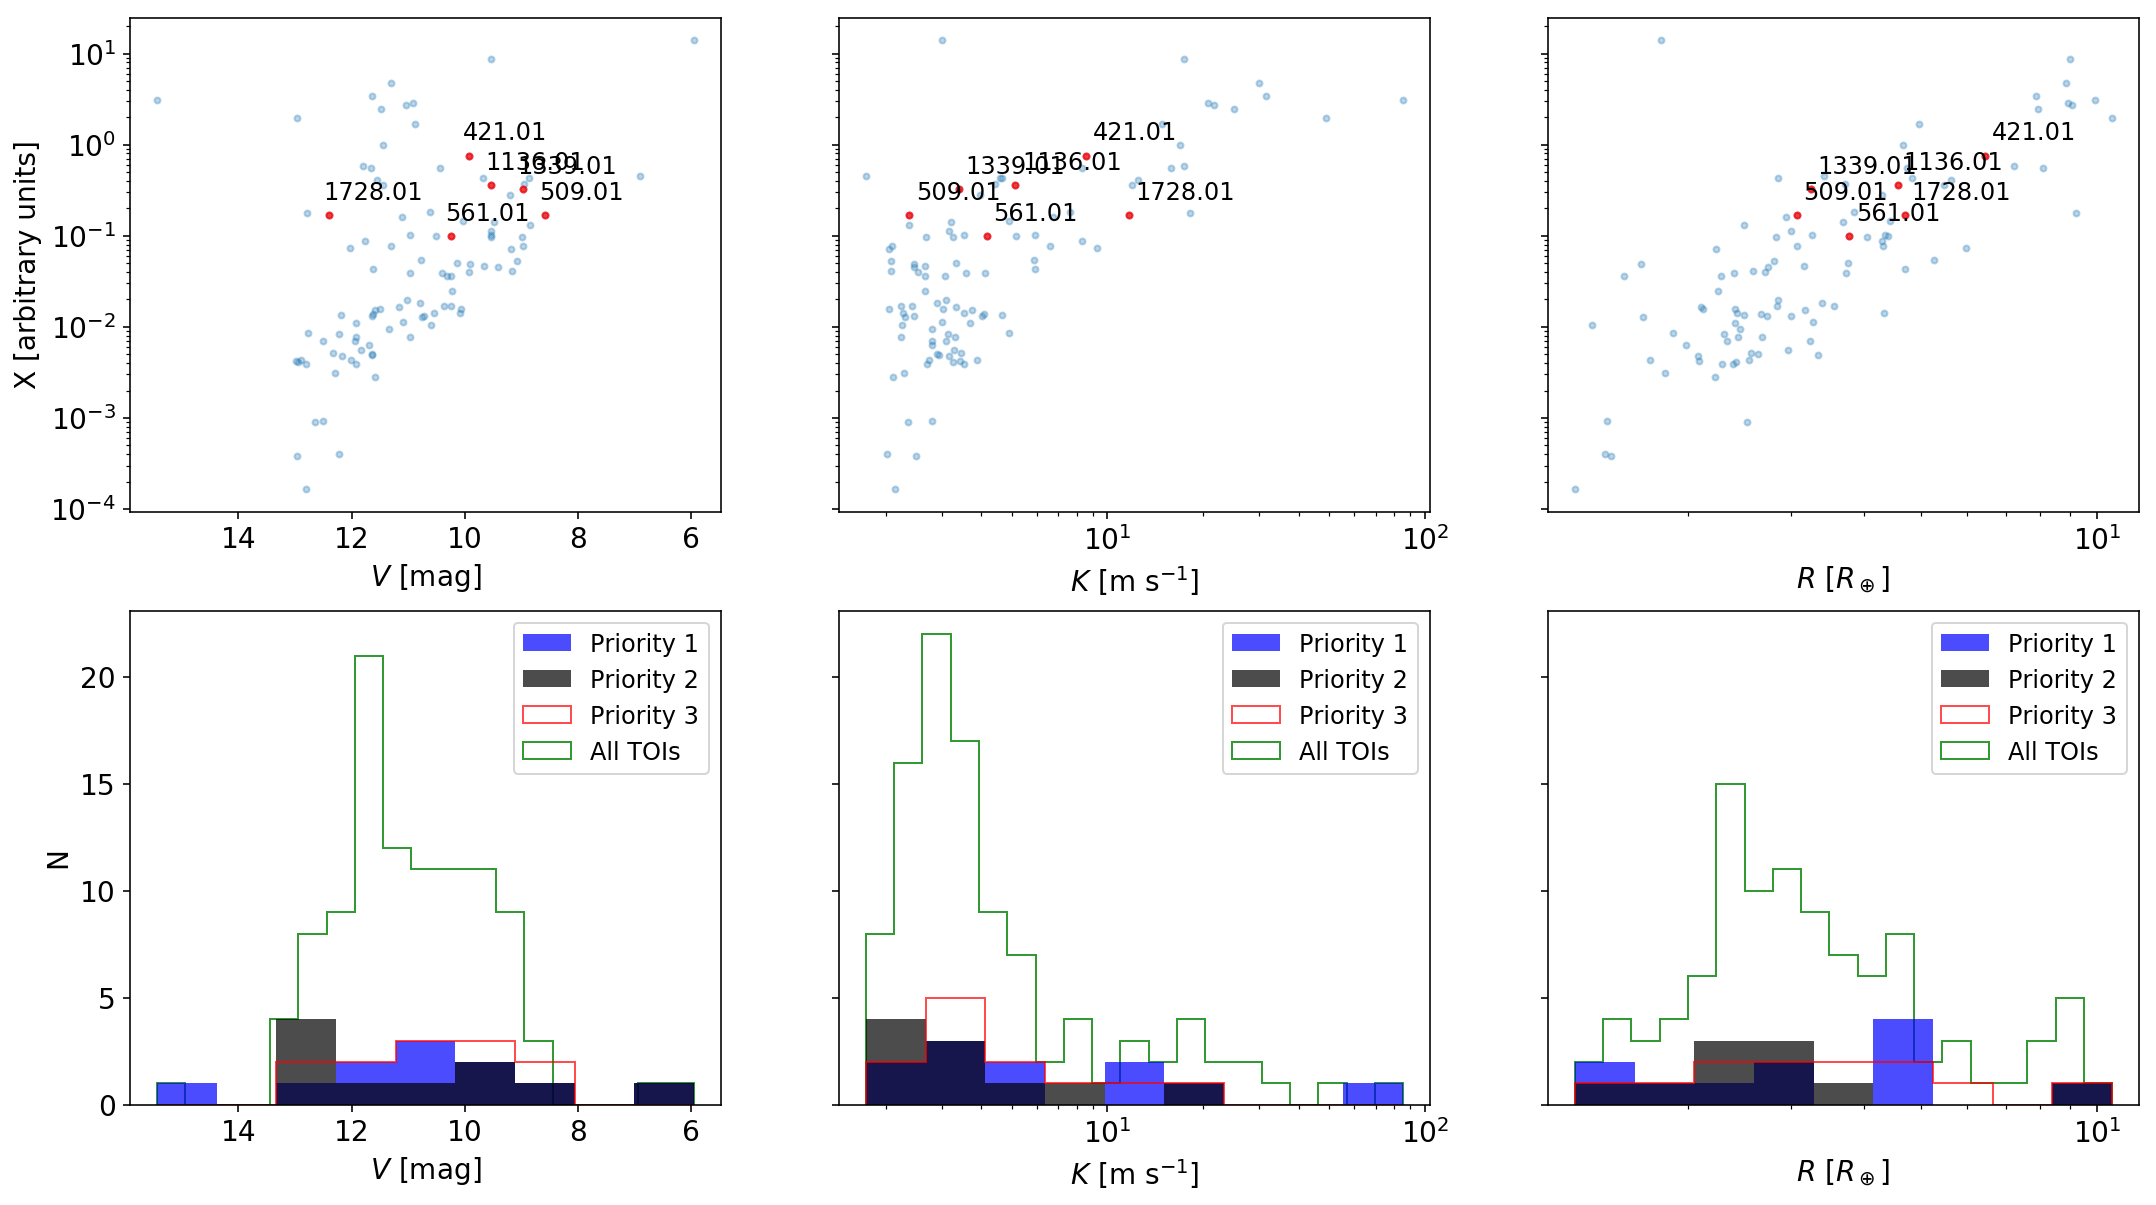

In [5]:
benchmarks = [421.01, 509.01, 561.01, 1136.01, 1339.01, 1728.01]
fig, axes = summary_plot(X_tois_df, benchmark_targets=benchmarks)

# Plot the distribution of all of the TOIs we're considering, even those which aren't ranked in their bin
_, __, ___, ax_p_vmag, ax_p_kamp, ax_p_rad = axes.flatten()
hist_axes = [ax_p_vmag, ax_p_kamp, ax_p_rad]
hist_keys = ['V mag', 'K_amp', 'Planet Radius Value']
for ax,key in zip(hist_axes, hist_keys):
    hist_bin_num = 20
    bins = None
    if key == 'V mag':
        bins = np.linspace(X_tois_df[key].min(), X_tois_df[key].max(), hist_bin_num)
    else:
        bins = np.logspace(np.log10(X_tois_df[key].min()), np.log10(X_tois_df[key].max()), hist_bin_num)
    ax.hist(X_tois_df[key], bins=bins, zorder=0, alpha=0.8, histtype='step', color='green', label='All TOIs')
    ax.legend(fancybox=True, fontsize=12)
    
plt.show()